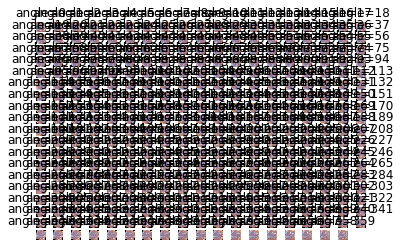

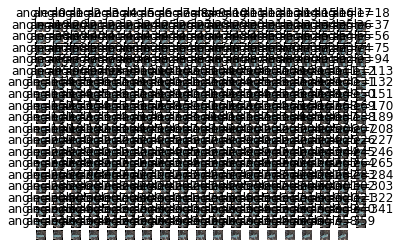

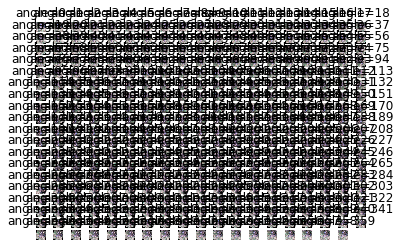

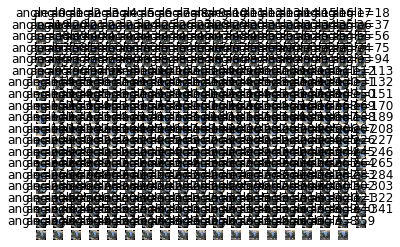

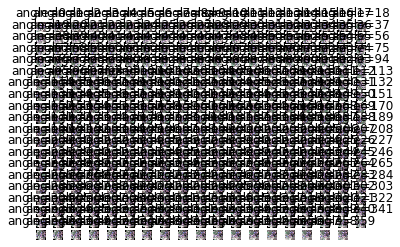

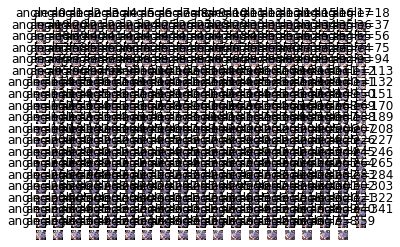

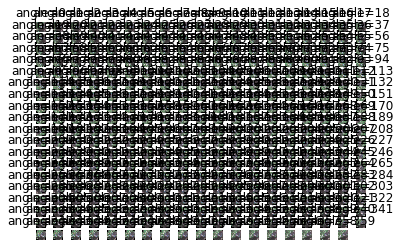

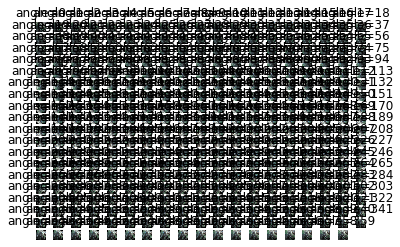

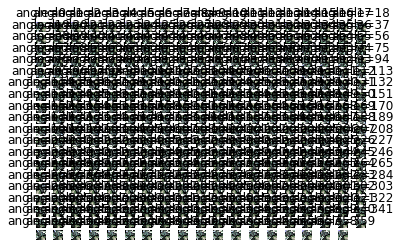

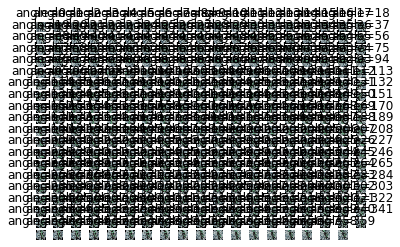

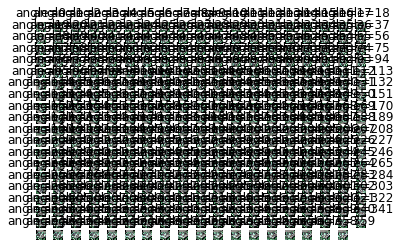

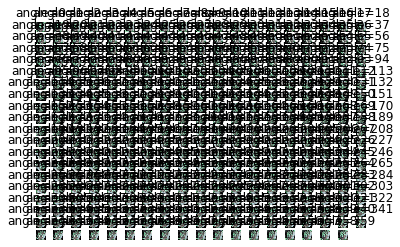

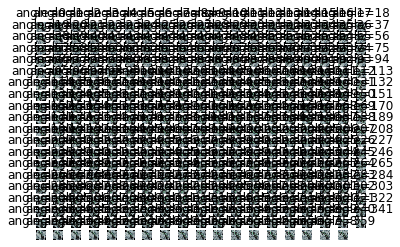

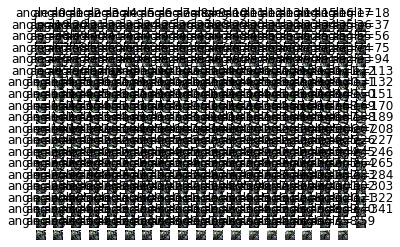

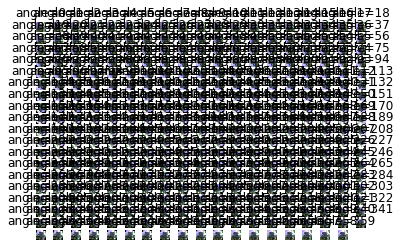

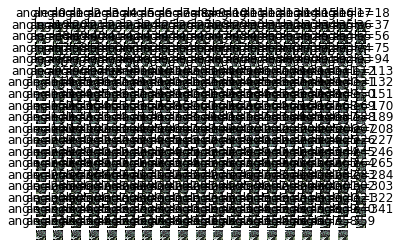

In [9]:
import cv2
import numpy as np
from glob import glob
import pdb
import copy
import matplotlib.pyplot as plt

np.random.seed(0)

num_classes = 2
img_height, img_width = 64, 64

CLS = ['akahara', 'madara']

# get train data
def data_load(path,hf=False,vf=False,rot=False):
    xs = []
    ts = []
    paths = []
    
    for dir_path in glob(path + '/*'):
        for path in glob(dir_path + '/*'):
            x = cv2.imread(path)
            x = cv2.resize(x, (img_width, img_height)).astype(np.float32)
            x /= 255.
            xs.append(x)

            for i, cls in enumerate(CLS):
                if cls in path:
                    t = i
            
            ts.append(t)

            paths.append(path)
            
            if hf:
                xs.append(x[:,::-1])
                ts.append(t)
                paths.append(path)
                
            if vf:
                xs.append(x[::-1])
                ts.append(t)
                paths.append(path)
                
            if hf and vf:
                xs.append(x[::-1,::-1])
                ts.append(t)
                paths.append(path)
                
            if rot != False:
                angle = rot
                scale = 1
                
                a_num = 360//rot
                w_num = np.ceil(np.sqrt(a_num))
                h_num = np.ceil(a_num / w_num)
                count = 1
                plt.subplot(h_num,w_num,count)
                plt.axis("off")
                plt.imshow(x)
                plt.title("angle=0")
                
                while angle < 360:
                    _h,_w,_c = x.shape
                    max_side = max(_h,_w)
                    tmp = np.zeros((max_side,max_side,_c))
                    tx = int((max_side - _w)/2)
                    ty = int((max_side - _h)/2)
                    tmp[ty:ty+_h, tx:tx+_w] = x.copy()
                    M = cv2.getRotationMatrix2D((max_side/2,max_side/2),angle,scale)
                    _x = cv2.warpAffine(tmp,M,(max_side,max_side))
                    _x = _x[tx:tx+_w, ty:ty+_h]
                    xs.append(x)
                    ts.append(t)
                    paths.append(path)
                    
                    count += 1
                    plt.subplot(h_num,w_num, count)
                    plt.imshow(_x)
                    plt.axis("off")
                    plt.title("angle={}".format(angle))
                    
                    angle += rot
                plt.show()
                    
    xs = np.array(xs, dtype=np.float32)
    ts = np.array(ts, dtype=np.int)
#     pdb.set_trace()
    xs = xs.transpose(0,3,1,2)

    return xs, ts, paths

xs, ts, paths = data_load("Dataset/train/images/",hf=True,vf=True,rot=1)

In [10]:
!pwd

/home/m-shiota/projects/MICRESEARCH/testscripts/Unet-test


In [11]:
mb = 3
mbi = 0
train_ind = np.arange(len(xs))
np.random.seed(0)
np.random.shuffle(train_ind)

epoch_max = 3
epoch = 0

while epoch < epoch_max:
    if mbi + mb > len(xs):
        mb_ind = copy.copy(train_ind)[mbi:]
        np.random.shuffle(train_ind)
        mb_ind = np.hstack((mb_ind, train_ind[:(mb-(len(xs)-mbi))]))
        epoch += 1
        mbi = mb - (len(xs) - mbi)
    else:
        mb_ind = train_ind[mbi: mbi+mb]
        mbi += mb

    print(mb_ind)

[3171 2749 2211]
[2979 1941 4831]
[ 731 1742 3669]
[2457 4602 4008]
[2984 3382 3932]
[2626 1369 3528]
[4495 2118 5466]
[ 502 2232 5524]
[4275 3412 5330]
[3220 3564 3616]
[3352 2983 4200]
[2611 2832 2172]
[1622  405 3521]
[1833  559 3582]
[3052 5706  661]
[5317 2806 5695]
[4367 1259 2612]
[1294 3039 1281]
[4626 3722 5108]
[1299 2346   98]
[2262 1482 2137]
[5242  134  142]
[2630 3368 2566]
[2578  144  548]
[5383 2104 4520]
[2805 5574 2048]
[ 257 1710  202]
[2617 2753 1848]
[2066  444 3788]
[ 994 1939 2591]
[ 918 3649   29]
[5737  620 1456]
[4617  143  977]
[2102 1931 3471]
[2029 2701 4175]
[2228 2323 4945]
[4129 5672 2133]
[ 302 5760  828]
[3885 1500 1586]
[2481 5561 3910]
[  15 3201  629]
[ 737 2164 5210]
[2568 1398 4784]
[5167 5688  532]
[3874 5003  944]
[1961 5299 3035]
[3947 3040  601]
[  42 1815 4184]
[4779  527 2448]
[5117 4033 4465]
[1122 2831 2730]
[4233 4258 2337]
[4425  979 4356]
[3073 5548 1314]
[3411 1771 4287]
[1830 3562 4190]
[2091  861 2033]
[ 519 5658 1161]
[3653 1755 231